<a href="https://colab.research.google.com/github/royheyer/Recell/blob/main/Recell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Supervised Learning - Foundations Project: ReCell
# Problem Statement
# Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.
Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.
# Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

    brand_name: Name of manufacturing brand
    os: OS on which the device runs
    screen_size: Size of the screen in cm
    4g: Whether 4G is available or not
    5g: Whether 5G is available or not
    main_camera_mp: Resolution of the rear camera in megapixels
    selfie_camera_mp: Resolution of the front camera in megapixels
    int_memory: Amount of internal memory (ROM) in GB
    ram: Amount of RAM in GB
    battery: Energy capacity of the device battery in mAh
    weight: Weight of the device in grams
    release_year: Year when the device model was released
    days_used: Number of days the used/refurbished device has been used
    normalized_new_price: Normalized price of a new device of the same model in euros
    normalized_used_price: Normalized price of the used/refurbished device in euros


In [ ]:
#Function to import Google my drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Function imports csv file for a dataframe
from google.colab import files
uploaded = files.upload()

Saving used_device_data.csv to used_device_data (1).csv


In [ ]:
#Function defines a dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Exploratory Data Analysis

In [ ]:
#Function to view a random sample of the data for better observation
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


# Observations:
1. There are 34 different manufacturing brands, 4 different operating systems, 4gs or 5gs have either values yes or no for different phones
2. Anroid is overwhelmingly the most popular os, with 3246 phones
3. There are 2359 phones that have 4g capability and only 152 phones have 5g capability


In [ ]:
#Function shows the number of rows and columns of a dataframe
data.shape

(3454, 15)

# Observations:
The dataset has 3571 rows and 15 columns

In [ ]:
#Function shows column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

# Observations:
1. brand_name, os, 4g and 5g are categorical while all others are numerical data types
2. main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values (these will need to be addressed)
3. used_price is an dependant variable

In [ ]:
#Funtion to create a copy of the data to avoid any changes to original data
df = data.copy()

In [ ]:
#Function to convert object data types to category
category_col = df.select_dtypes(exclude=np.number).columns.tolist()
df[category_col] = df[category_col].astype("category")

In [ ]:
#Function to see that all columns are of the right data types
df.dtypes

brand_name               category
os                       category
screen_size               float64
4g                       category
5g                       category
main_camera_mp            float64
selfie_camera_mp          float64
int_memory                float64
ram                       float64
battery                   float64
weight                    float64
release_year                int64
days_used                   int64
normalized_used_price     float64
normalized_new_price      float64
dtype: object

In [ ]:
#Function to check for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

# Obsaervations:
There are six categories with missing data.

# UNIVARIATE ANALYSIS

In [ ]:
#Function to plot a boxplot and a histogram

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightblue"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [ ]:
#Funtion to verify used and new price are normal distribtions
histogram_boxplot(df, "normalized_used_price", kde=True)

# Observations:
The mean and median used phone prices seem to be very similar and normally distributed

In [ ]:
#Funtion to verify used and new price are normal distribtions
histogram_boxplot(df, "normalized_new_price", kde=True)

Obervations:
The mean and median new phone prices appear to be sinilar and normally distributed

In [ ]:
#Plot histogram and boxplot of screen_size
histogram_boxplot(df, "screen_size")

Observations:

The distribution is rightly skewed with outliers on both sides It has a median of about 14cm

In [ ]:
#Plot histogram and boxplot of battery
histogram_boxplot(df, "battery")

# Observations:

Battery capacity is almost a normal distribution It has some outliers It has a median and mean around 3000 mAh

In [ ]:
#Plot histogram and boxplot of weight
histogram_boxplot(df, "weight")

# Observations:

The graph shows a right skewed distribution with a lot of outliers

In [ ]:
#Plot histogram and boxplot of days_used
histogram_boxplot(df, "days_used")

# Observations:

The distribution is skewed to the left and has a median of about 695 and a mean around 680 days.

In [ ]:
#Plot barplot of brand_name with percentage showing on each bar
labeled_barplot(df, "brand_name", perc=True)

# Observations:
Most of the phones in the dataset are those with no known brand name Samsung is the highest represented known brand followed by Huawei

In [ ]:
#Plot barplot of os with percentage showing on each bar
labeled_barplot(df, "os", perc=True)

Observations:

Android OS are seen to be 93.1% and IOS has the least percetage of 1.0%

In [ ]:
#Plot barplot of 4g
labeled_barplot(df, "4g", perc=True)

# Observations:
Most phones seem to have 4G functionality at 67.6%

In [ ]:
#Plot barplot of 5g
labeled_barplot(df, "5g", perc=True)

## Observations:
Very few phones have 5G functionality at 4.4%

In [ ]:
#Check number of unique RAM
df["ram"].nunique()

# Observations:
There are 12 unigue entries for phone RAM

In [ ]:
#Plot barplot of ram with percentage shown
labeled_barplot(df, "ram", perc=True)

Observations:
Most phones have 4.0MB of RAM

In [ ]:
#Plot barplot of release_year with percentage shown
labeled_barplot(df, "release_year", perc=True)

Observations:
The phone model year seems fairly evenly distributed

In [ ]:
#Plot barplot of int_memory with percentage showing on each bar
labeled_barplot(df, "int_memory", perc=True)

# Observations:
Internal memory is most common at 16MB at 37.1% followed closely by 32MB at 31.4%

In [ ]:
#Function to find the mean of phone ram in each brand
df.groupby("brand_name")["ram"].mean()

In [ ]:
#Plot barplot of ram
labeled_barplot(df, "ram", perc=True)

Observations:
The overall phone RAM is in the 4.0MB range at 81.5%

In [ ]:
#Barplot of main phone camera
labeled_barplot(df, "main_camera_mp", perc=True)

# Observations:
The main cameras are in the 13MP category at 22.9%


In [ ]:
#Barplot of selfie camera
labeled_barplot(df, "selfie_camera_mp", perc=True)

# Observations:
Most cameras have a 5MP selfie camera at 22.9%

# BIVARIATE ANALYSIS

In [ ]:
#Funtion to find the mean of phone ram in each brand
df.groupby("brand_name")["ram"].mean()

In [ ]:
#Function to determine corelation
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)
plt.show()

Observations:

There is a high correlation with screen size and battery where the used phones tend to cost more possible due to battery replacement

The used price is highly correlated with new price which means the higher the new price the higher the used price is

The release year is moderately corrrelated with used price which means the earlier released phone cost more

The size of the selfie camera and main camera shows a moderate correlation in the used price indicating the higher resolution phones cost more

The screen size shows moderate corelation indicating the phones with larger screens cost more in the used market

# Fixing Missing Column Data

In [ ]:
#Function to check for missing values
df.isnull().sum()

In [ ]:
#We're going to fill the missing columns with the median values for those columns
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df[col_to_fill] = df[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
#Function to recheck the number of missing values
df.isnull().sum()

Missing data has been addressed

# Create Dummy Values for Categorical Columns

In [ ]:
#Function to create dummy variables for the categorical variables
df1 = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

In [ ]:
#New dataframe containing the dummy categorical variables
df1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


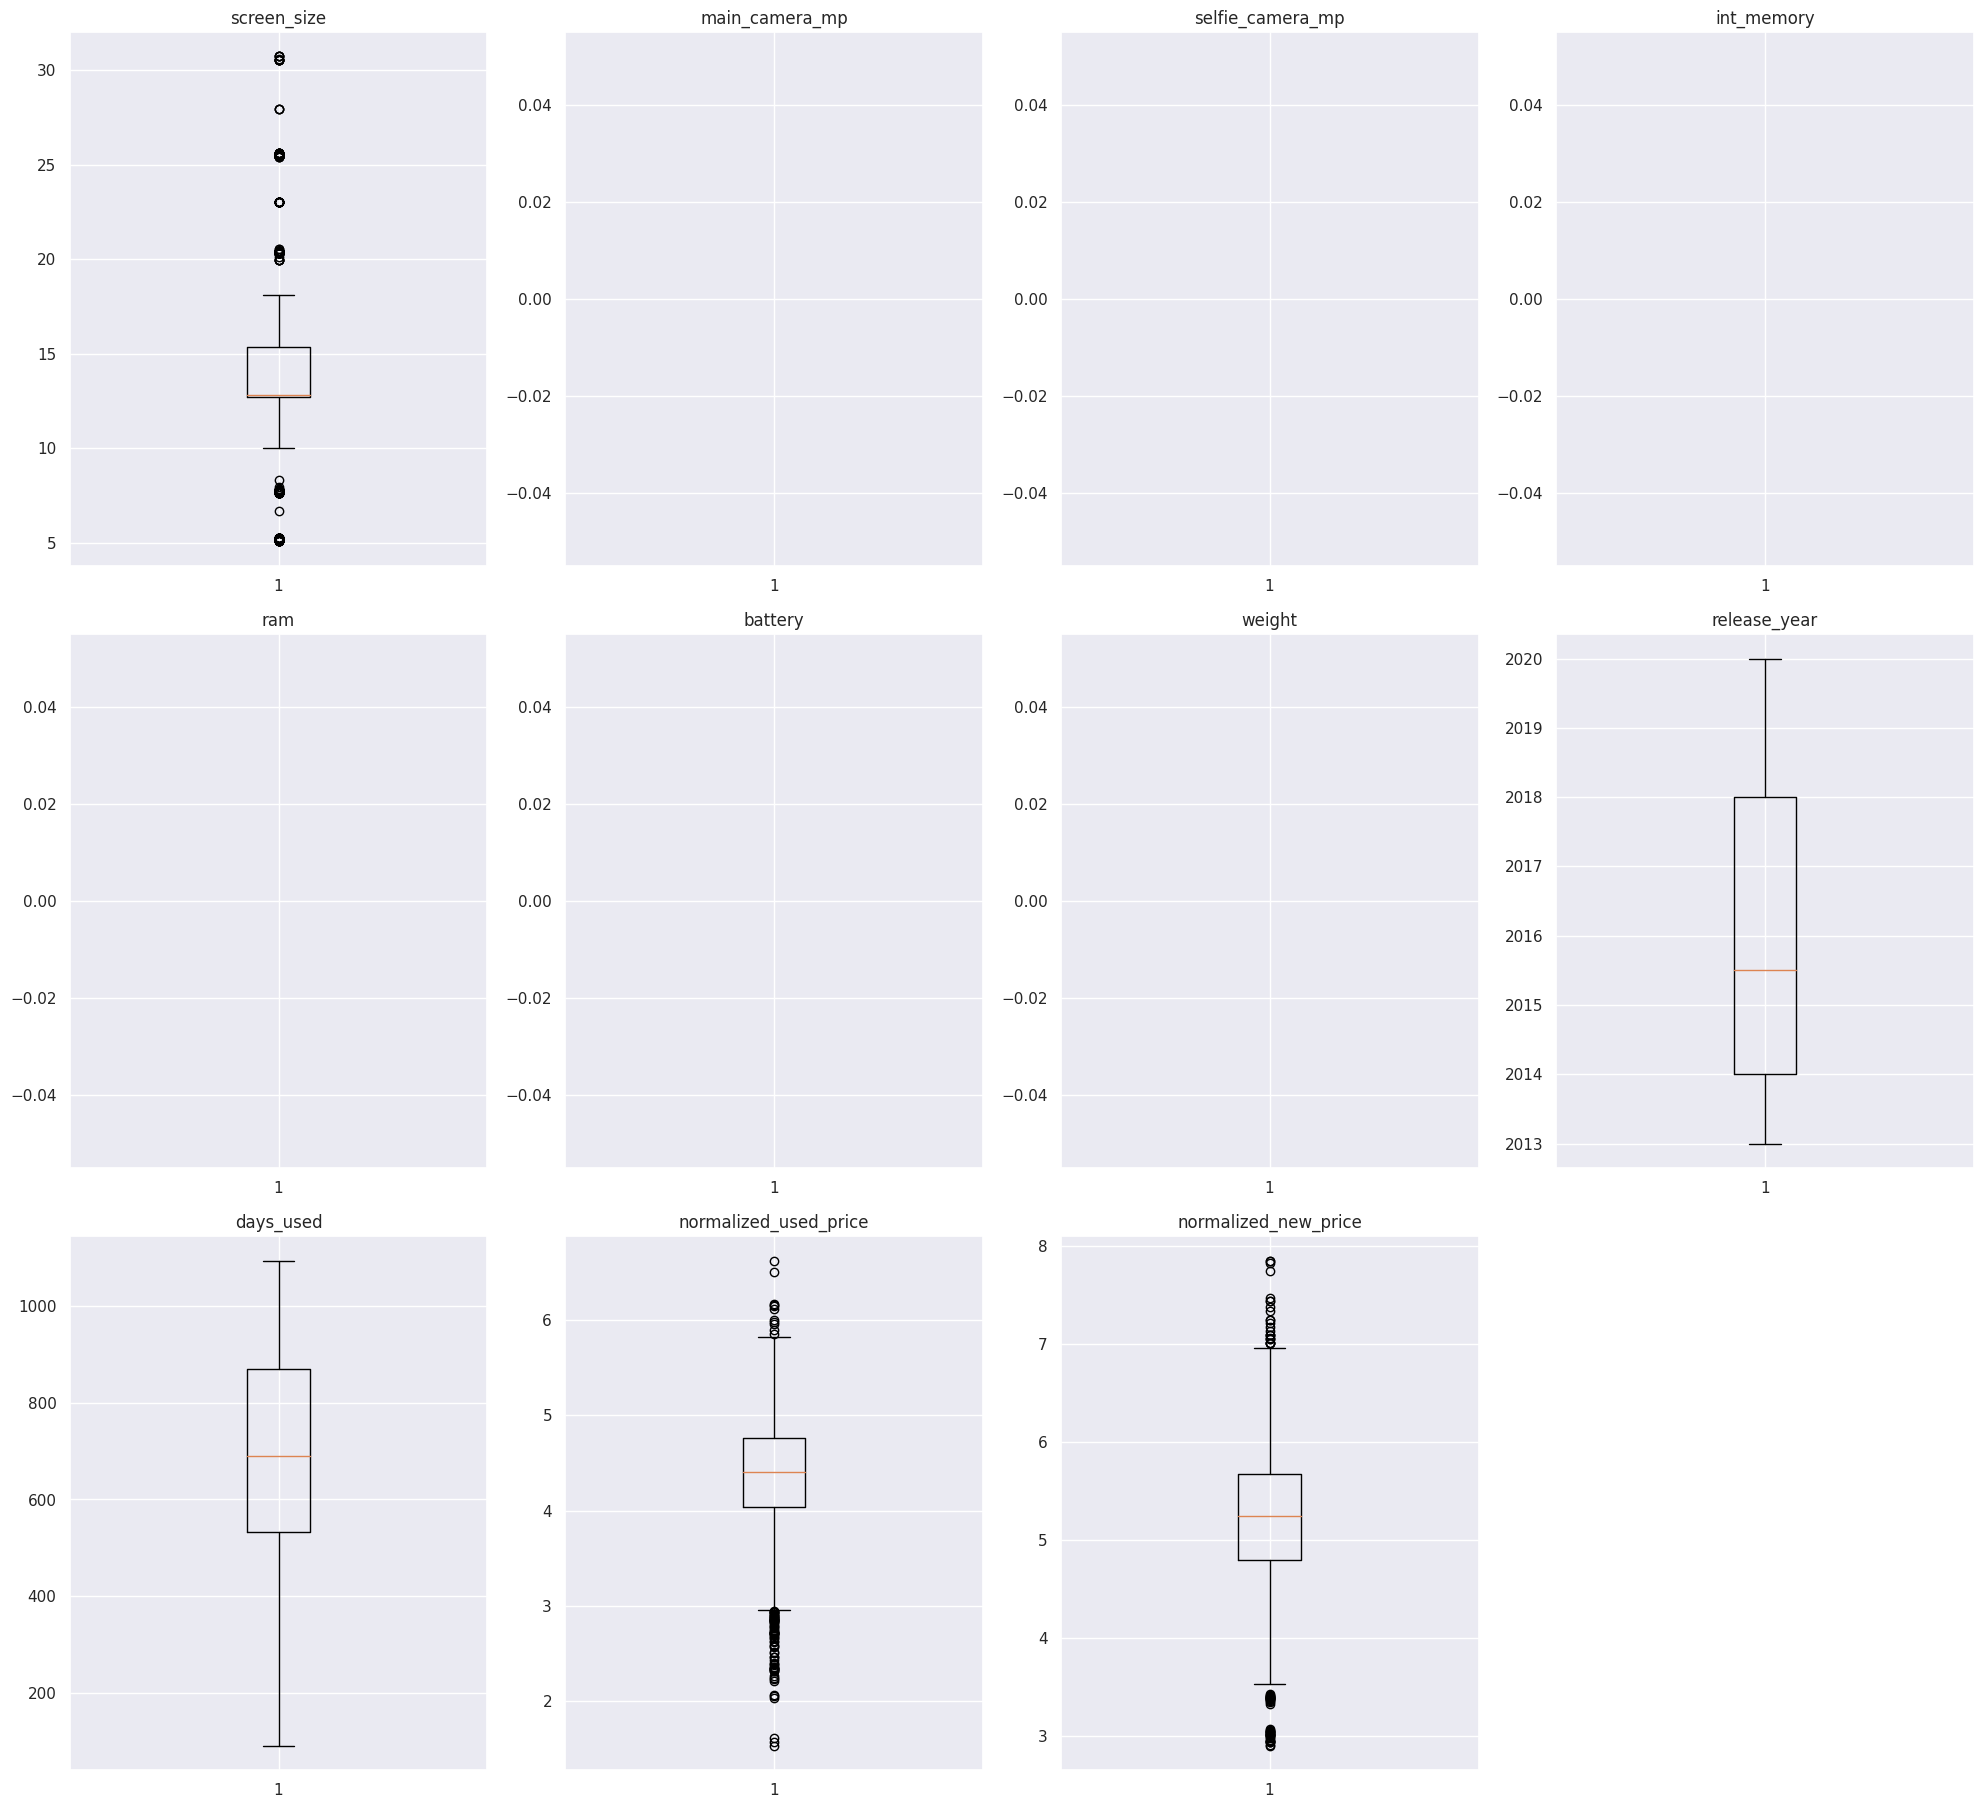

In [ ]:
#Outliers boxplots of all numerical columns
plt.figure(figsize=(20, 30))

for i, var in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

# Observations:
Outliers are present in all the numerical columns except for days used and release year.

Because of this we will not treat the outliers, treating the outliers may lead to loss of information.

# Linear Regression Model


In [ ]:
#Define X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

NameError: ignored

In [ ]:
#Function to view independent variables
X.head()

In [ ]:
#Function to view independent variables
y.head()

In [ ]:
#Dividing the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [ ]:
#Function to check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

In [ ]:
#LinearRegression function
linearregression = LinearRegression()
#Fitting the dependent and independent train data
linearregression.fit(X_train, y_train)

In [ ]:
#Function showing model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

# Model Performance Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
#Checking model performance on 70% train set
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, X_train, y_train)
linearregression_train_perf

In [ ]:
#Checking model performance on 30% test set
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

# Observations:
The training is 0.84, indicating that the model explains approx. 84% of the variation in the train data. So, the model is not underfitting

MAE (0.178, 0.188) and RMSE (0.230, 0.238) on the train and test sets are comparable, which shows that the model is not overfitting

MAE indicates that our current model is able to predict used_price within a mean error of 0.188 on the test data

MAPE on the test set suggests we can predict within 4.50% of used_price

One could remove the columns days_used, weight and internal_memory (low correlations) to see if there are improvements in the R-squared value

# Evaluating Dataset with Statsmodel Funtion

In [ ]:
#Statsmodels function does not add a constant to the data on its own and must add the constant manually
X_train1 = sm.add_constant(X_train)
#Adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

NameError: ignored

# Observations:

1. Negative values of the coefficient show that used_price decreases with the increase of corresponding attribute value

2. Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value

3. The p-value of a variable indicates it's significance. If we consider the significance level to be 0.05. Any variable with a p-value less than 0.05 would be considered significant

4. However, these variables might contain multicollinearity, which will affect the p-values. We will need to deal with multicollinearity and then look at the p-values

# Test for Multicollinearity

General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity. If VIF is between 5 and 10, we say there is moderate multicollinearity. If VIF is exceeding 10, it shows signs of high multicollinearity.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#unction to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    #Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [ ]:
checking_vif(X_train1)

NameError: ignored

# Observations:
As predicted from the correlation heat map screen_size and weight are potential columns to remove with high VIF values

# Course of Action to Remove Multicollinearity
1. We will drop every column one by one that has a VIF score greater than 5

2. Look at the adjusted R-squared and RMSE of all these models

3. Drop the variable that makes the least change in adjusted R-squared

4. Check the VIF scores again

5. Continue till you get all VIF scores under 5

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    #Function to create empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    #Funtion to build ols models by dropping one of the high VIF columns at a time
    #Funtion to store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        #Defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        #Createing the model
        olsmodel = sm.OLS(target, train).fit()

        #Adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    #Creating a dataframe for the results
    provisional = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    provisional.reset_index(drop=True, inplace=True)

    return provisional

In [ ]:
col_list = [
    "screen_size",
    "weight",
    "brand_name_LG",
    "brand_Samsung",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

In [ ]:
#Drop screen_size column
col_to_drop = "brand_Samsung"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

#Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

In [ ]:
#Drop os_iOS, screen_size, brand_name_Samsung columns
col_to_drop = "brand_name_LG","brand_name_Samsung", "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

#Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

The VIF numbers indicate no multicollinearity and the assumption is satisfied

In [ ]:
#Next we check the model performance
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

# Observations:
We can see that adj. R-squared has remained approx. same 0.844 for the train set dataset, which shows that the dropped column os_iOS, screen_size, brand_name_Samsung  did not have much effect on the model

As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

Columns main_camera_mp, selfie_camera_mp, weight, ram, release_year and normalized_new_price have p-value > 0.05 thus are not significant. we will drop those variables. Because p-values can change after dropping a variable, we will not drop all variables at once. Instead, we will do the following:
1. Build a model to check the p-values of the variables, and drop the column with the highest p-value
2. Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
3. Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
#Creating an initial list of columns
cols = X_train2.columns.tolist()

#Establishing an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #Defining the train set
    X_train_aux = X_train2[cols]

    #Fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    #Acquiring the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    #Acquiring the name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train3 as the final ones and olsmod2 as final model

# Observations:

Now adjusted R-squared is 0.842, which is similar to the initial training data at .849. This shows that the variables we dropped were not affecting the model

# TEST FOR LINEARITY AND INDEPENDENCE

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant

Check for linearity and independence-

1. Make a plot of fitted values vs residuals
2. The model is linear and residuals are independent if they don't follow any pattern
3. The model is showing signs of non-linearity and residuals are not independent if the above condition is not met

In [ ]:
#Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

In [ ]:
#Plot the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

We see a very faint "U" pattern in the plot of residuals vs fitted values, however, this may be considered negligible given the range of residuals is very close to 0. The pattern may indicate that the model has some non linear dependancies and may be improved by transforming the columns or better defined by non-linear models


# Test for Normality
1. Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model

2. The shape of the histogram of residuals can give an initial idea about the normality

3. It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals are mostly following  a straight line except for the tails
Let's check the results of the Shapiro-Wilk test

In [ ]:
stats.shapiro(df_pred["Residuals"])

1. Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
2. Strictly speaking, the residuals are not normal
However, as an approximation, we can accept this distribution as close to being normal

The assumption is satisfied

# Test for Homoscedasticity
Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic

The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic

In [ ]:
#Goldfeldquandt test for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

In [ ]:
#Predictions on the test set
pred = olsmod2.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

We can observe here that our model has returned good prediction results, and the actual and predicted used_price are comparable, although there is further scope for improvement

We can also visualize the comparison result with the following bar graph

In [ ]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [ ]:
#Checking model performance on train set
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
olsmod2_train_perf

In [ ]:
#Checking model performance on test set
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
olsmod2_test_perf

# Observations:
1. The model is able to explain ~84% of the variation in the data, which is very good

2. The train and test RMSE and MAE ~0.235 and ~0.239 are low and comparable. So, our model is not suffering from overfitting

3. The MAPE on the test set suggests we can predict within 4.5% of used_price

4. Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes

In [ ]:
#Training performance comparison
models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
#Test performance comparison
models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

The performance of the two models are similar

Recreating the final statsmodels and printing it's summary for conclusions

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

# Concusions and Business Recommendations:
1. Release_year has an impact on used phone prices, as expected. Newly released phones have higher used prices, the higher the new price the higher the used price will be.
2. The older the phone, the lower the used price. Most customers want phones that are in demand.
3. As expected, we can see that selfie_camera, screen_size, and main_camera_mp are significant parameters. As these increase the used price increases. This is indicated by positive coefficients for these parameters predicted by the model.
4. The phone brand Celkon as well as os_others have a lower used price. They seem to not be a demand for customers and should probably be discontinued.
5. RAM for the refurbished phones was found to be constant ~4GB on average across the dataset, and insignificant.
6. Similar to RAM, almost 93.1% of phones were found to be operating on Android os, also an insignificant factor for prediction.
7. The linear predictive model is able to predict the used_price of the phone, explaining ~84.6% of the variance in the data, within a mean absolute percentage error of ~4.5%. The model is considered to be good.
8. Phones with 4g capability are widely represented in this data set, however 5G phones are newer technology and would be expected to command higher used prices when more widely available.
9. All of the assumptions for linear regression were met for the model. However, the data gave the impression that non-linear models may be more suited for prediction.